In [1]:
import pandas as pd
import preprocessing as pp
import utils as utils
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline

In [2]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = utils.importar_datos()

### Modelo 1

- Preprocesamiento con StandardScaler
- Estimación de Hiperparametros con GridSearchCV
- Estimación de algortimo con GridSearchCV

In [4]:
preprocessor = pp.PreprocessingSE()
model = KNeighborsClassifier(n_jobs=-1)

In [5]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [6]:
params = {'model__n_neighbors': np.arange(1, 50, 5), 'model__weights': ['uniform', 'distance'], 
          'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}
cv = utils.kfold_for_cross_validation()
#rgscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)
#print(rgscv.best_score_)
#print(rgscv.best_params_)

0.850288112738014
{'model__algorithm': 'kd_tree', 'model__n_neighbors': 21, 'model__weights': 'uniform'}


In [7]:
from sklearn.neighbors import KDTree

params = {'model__n_neighbors': np.arange(1, 50, 5), 'model__weights': ['uniform', 'distance'], 
          'model__metric': KDTree.valid_metrics}
cv = utils.kfold_for_cross_validation()
#rgscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)
#print(rgscv.best_score_)
#print(rgscv.best_params_)

0.8564403705563179
{'model__metric': 'manhattan', 'model__n_neighbors': 21, 'model__weights': 'uniform'}


In [8]:
model = KNeighborsClassifier(n_jobs=-1, n_neighbors=21, algorithm='kd_tree', weights='uniform', metric='manhattan')

In [9]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [10]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.856440,0.015642,0.852827,0.885187,0.829796
accuracy,0.805285,0.025605,0.805243,0.840000,0.770000
precision,0.799942,0.041241,0.798419,0.892857,0.758621
recall,0.658148,0.063045,0.657980,0.743590,0.564103
f1 score,0.720332,0.043437,0.721429,0.763158,0.656716


### Modelo 2

- Algoritmo ball-tree
- Preprocesamiento con StandardScaler
- Estimación de metrica mediante GridSearchCV

In [11]:
preprocessor = pp.PreprocessingSE()
model = KNeighborsClassifier(n_jobs=-1, algorithm='ball_tree')

In [12]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [13]:
from sklearn.neighbors import BallTree

params = {'model__n_neighbors': np.arange(1, 50, 5), 'model__weights': ['uniform', 'distance'], 
          'model__metric': BallTree.valid_metrics}
cv = utils.kfold_for_cross_validation()
#gscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)

In [14]:
#gscv.best_score_

0.8550171242286246

In [15]:
#gscv.best_params_

{'model__metric': 'canberra',
 'model__n_neighbors': 31,
 'model__weights': 'uniform'}

In [16]:
preprocessor = pp.PreprocessingSE()
model = KNeighborsClassifier(n_jobs=-1, algorithm='ball_tree', n_neighbors=21, weights='uniform', metric='canberra')

In [17]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [18]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.850690,0.024592,0.849203,0.888795,0.810059
accuracy,0.792797,0.027840,0.792759,0.830000,0.740000
precision,0.798954,0.045607,0.797468,0.888889,0.724138
recall,0.616059,0.056124,0.615635,0.710526,0.538462
f1 score,0.694315,0.043962,0.694853,0.739726,0.617647


### Metricas finales

Se eligió el [Modelo 1](#Modelo-1) en base a los resultados obtenidos mediante `cross_validation`.

In [19]:
preprocessor = pp.PreprocessingSE()
model = KNeighborsClassifier(n_jobs=-1, n_neighbors=21, algorithm='kd_tree', weights='uniform', metric='manhattan')

In [20]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.870870,0.834711,0.861111,0.673913,0.756098


Matriz de confusión:


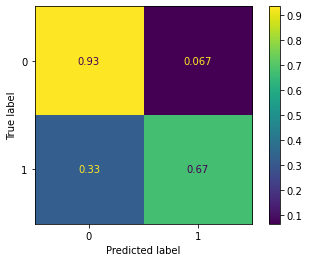

In [21]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

### Predicción HoldOut

In [22]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/6-KNN.csv')